## Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc as pm

from pathlib import Path

plt.style.use("ggplot")

## Data

In [3]:
PATH_DATA = Path("../Data")

df = pd.read_csv(PATH_DATA / "h1weekly.csv", parse_dates=["Date"])

In [4]:
df

,Date,IsCanceled
0,2015-06-21,41
1,2015-06-28,48
2,2015-07-05,87
3,2015-07-12,74
4,2015-07-19,101
...,...,...
110,2017-07-30,173
111,2017-08-06,140
112,2017-08-13,182
113,2017-08-20,143


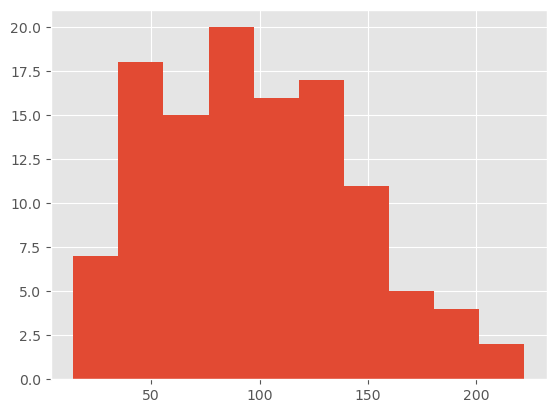

In [6]:
plt.hist(df["IsCanceled"]);

In [8]:
np.mean(df["IsCanceled"]), np.std(df["IsCanceled"])

(96.71304347826087, 45.6656592918938)

In [11]:
mu_prior = (222+14) / 2
sigma_prior = 10
print(mu_prior, sigma_prior)

118.0 10


In [12]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=mu_prior, sigma=sigma_prior)
    sd = pm.HalfCauchy("sd", beta=10)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=df["IsCanceled"])
    idata = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [14]:
with model:
    post_pred = pm.sample_posterior_predictive(idata.posterior)

Sampling: [obs]


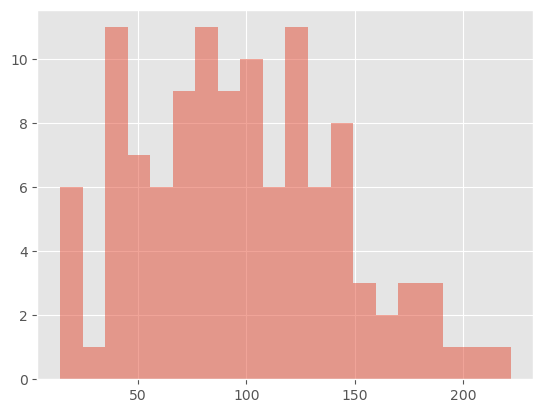

In [27]:
plt.hist(post_pred["observed_data"]["obs"], bins=20, alpha=0.5, label="Posterior predictive");

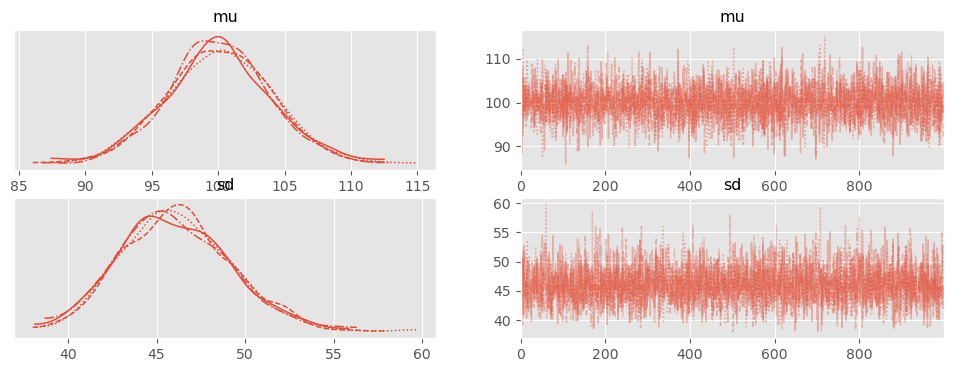

In [19]:
az.plot_trace(idata);

In [28]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,100.061,3.962,92.446,107.442,0.065,0.046,3731.0,2827.0,1.0
sd,46.095,3.134,40.541,52.254,0.051,0.036,3873.0,2606.0,1.0


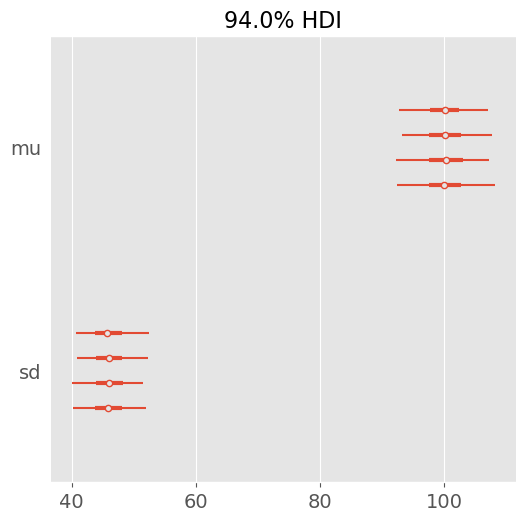

In [31]:
az.plot_forest(idata);

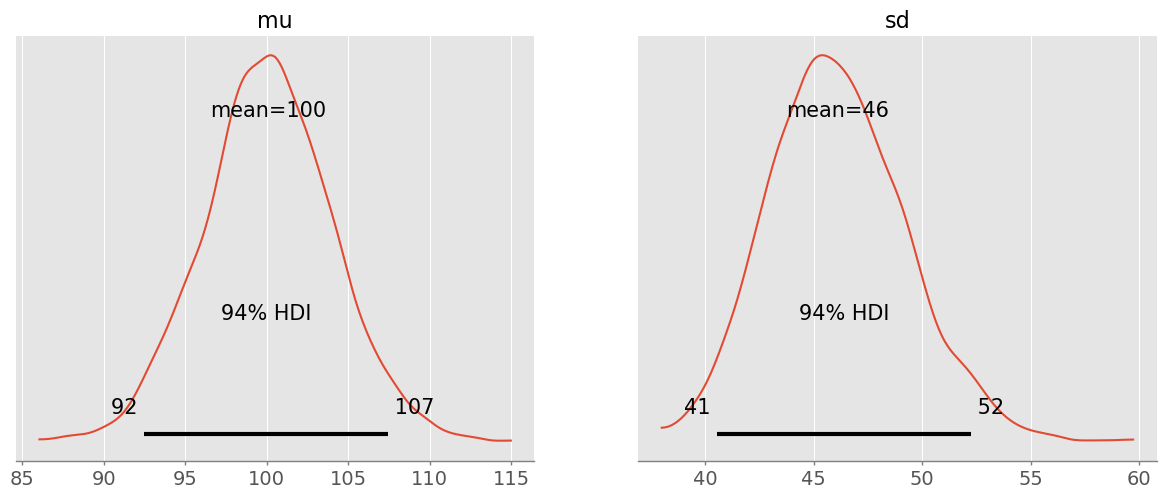

In [32]:
az.plot_posterior(idata);

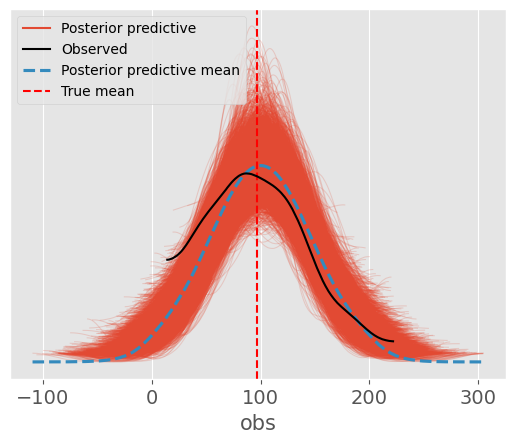

In [34]:
fig, ax = plt.subplots()
az.plot_ppc(post_pred, ax=ax)
ax.axvline(df["IsCanceled"].mean(), ls="--", color="r", label="True mean")
ax.legend(fontsize=10);